In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [15]:
# Load the dataset
data = pd.read_csv('student_data.csv')

# Display basic information about the dataset
display(data.head())
print(data.info())

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   100 non-null    float64
 1   Review_Session  100 non-null    int64  
 2   Results         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB
None


In [17]:
# Prepare the features and target variable
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# SVM with Linear Kernel
linear_svm = SVC(kernel='linear', probability=True, random_state=42)
linear_svm.fit(X, y)

# Predictions and Accuracy (Linear Kernel)
predictions_linear = linear_svm.predict(X)
accuracy_linear = accuracy_score(y, predictions_linear)
print('Accuracy (Linear Kernel):', accuracy_linear * 100, '%')

Accuracy (Linear Kernel): 92.0 %


AUC (Linear Kernel): 0.9820772058823529


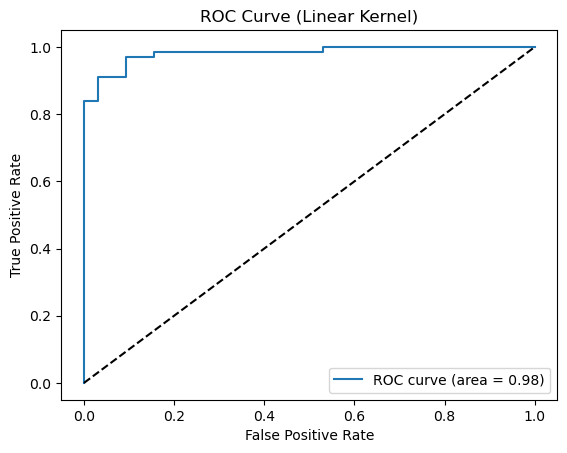

In [19]:
# AUC and ROC (Linear Kernel)
probabilities_linear = linear_svm.predict_proba(X)[:, 1]
auc_linear = roc_auc_score(y, probabilities_linear)
print('AUC (Linear Kernel):', auc_linear)

fpr, tpr, _ = roc_curve(y, probabilities_linear)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_linear)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Linear Kernel)')
plt.legend(loc='lower right')
plt.show()


In [21]:
# RBF Kernel with Grid Search for Best Gamma
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
rbf_svm = SVC(kernel='rbf', probability=True, random_state=42)
grid_search = GridSearchCV(rbf_svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [23]:
# Best Gamma
best_gamma = grid_search.best_params_['gamma']
print('Best Gamma:', best_gamma)

Best Gamma: 0.1


In [25]:

# Train SVM with RBF Kernel using Best Gamma
best_rbf_svm = SVC(kernel='rbf', gamma=best_gamma, probability=True, random_state=42)
best_rbf_svm.fit(X, y)

# Predictions and Accuracy (RBF Kernel)
predictions_rbf = best_rbf_svm.predict(X)
accuracy_rbf = accuracy_score(y, predictions_rbf)
print('Accuracy (RBF Kernel):', accuracy_rbf * 100, '%')

Accuracy (RBF Kernel): 93.0 %


AUC (RBF Kernel): 0.9738051470588235


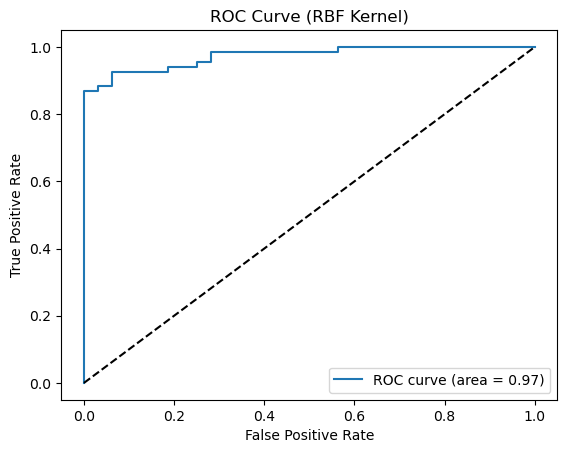

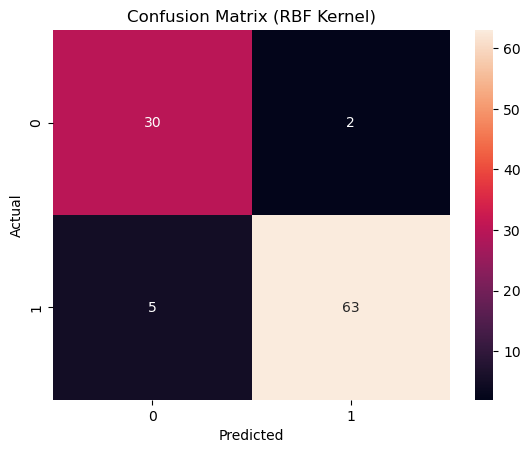

In [27]:
# AUC and ROC (RBF Kernel)
probabilities_rbf = best_rbf_svm.predict_proba(X)[:, 1]
auc_rbf = roc_auc_score(y, probabilities_rbf)
print('AUC (RBF Kernel):', auc_rbf)

fpr, tpr, _ = roc_curve(y, probabilities_rbf)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_rbf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (RBF Kernel)')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix for Best RBF Model
cm = confusion_matrix(y, predictions_rbf)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix (RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
# External Input Prediction for svm with rbf kernel 
def predict_pass(hours, review):
    input_data = pd.DataFrame([[hours, review]], columns=['Hours_Studied', 'Review_Session'])
    prediction = best_rbf_svm.predict(input_data)
    probability = best_rbf_svm.predict_proba(input_data)[0, 1] * 100
    print(f'Predicted Result: {prediction[0]}, Probability: {probability:.2f}%')

# Example of external input
predict_pass(5, 0)  # Predicting for 5 study hours and attending the review session


Predicted Result: 1, Probability: 95.89%


In [65]:
# External Input Prediction for svm with rbf kernel 
def predict_pass(hours, review):
    input_data = pd.DataFrame([[hours, review]], columns=['Hours_Studied', 'Review_Session'])
    prediction = linear_svm.predict(input_data)
    probability = linear_svm.predict_proba(input_data)[0, 1] * 100
    print(f'Predicted Result: {prediction[0]}, Probability: {probability:.2f}%')

# Example of external input
predict_pass(5, 0)  # Predicting for 5 study hours and attending the review session


Predicted Result: 1, Probability: 80.82%
